In [5]:
import pandas as pd
import numpy as np
data=pd.read_excel('C:\\Users\\maganti akshita\\Downloads\\19CSE305_LabData_Set3.1.xlsx', sheet_name ="thyroid0387_UCI")
data_types = data.dtypes
categorical_cols = data.select_dtypes(include=['object']).columns
nominal_cols = ['referral source'] + [col for col in data.columns if data[col].dtype == 'O' and data[col].str.contains('\?').any()]
ordinal_cols = list(set(categorical_cols) - set(nominal_cols))
numeric_cols = data.select_dtypes(include=['number'])
data_range = numeric_cols.describe().loc[['min', 'max']]
missing_values = data.isin(['?']).sum()
outliers = {}
for col in numeric_cols.columns:
    mean = numeric_cols[col].mean()
    std = numeric_cols[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    outliers[col] = len(numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)])
numeric_mean = numeric_cols.mean()
numeric_variance = numeric_cols.var()
print("Task 1: Data Types")
print(data_types)
print("\nTask 2: Encoding Schemes")
print("Nominal Columns:", nominal_cols)
print("Ordinal Columns:", ordinal_cols)
print("\nTask 3: Data Range")
print(data_range)
print("\nTask 4: Missing Values")
print(missing_values)
print("\nTask 5: Outliers")
print(outliers)
print("\nTask 6: Mean and Variance for Numeric Variables")
print("Mean:")
print(numeric_mean)
print("\nVariance:")
print(numeric_variance)

Task 1: Data Types
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measu

In [6]:
import pandas as pd
import numpy as np
data = pd.read_excel('C:\\Users\\maganti akshita\\Downloads\\19CSE305_LabData_Set3.1.xlsx', sheet_name ="thyroid0387_UCI")
for col in data.columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        if col in ['TSH', 'T3', 'TT4', 'T4U', 'FTI']:
            data[col].fillna(data[col].median(), inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)
    elif data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
missing_values_after_imputation = data.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_after_imputation)


Missing Values After Imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype:

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_excel('C:\\Users\\maganti akshita\\Downloads\\19CSE305_LabData_Set3.1.xlsx', sheet_name ="thyroid0387_UCI")
data.replace('?', np.nan, inplace=True)
numeric_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
data[numeric_attributes] = data[numeric_attributes].apply(pd.to_numeric, errors='coerce')
minmax_scaler = MinMaxScaler()
data[numeric_attributes] = minmax_scaler.fit_transform(data[numeric_attributes])
print("Normalized Data:")
print(data.head())

Normalized Data:
   Record ID       age sex on thyroxine query on thyroxine  \
0  840801013  0.291667   F            f                  f   
1  840801014  0.291667   F            f                  f   
2  840801042  0.416667   F            f                  f   
3  840803046  0.364583   F            f                  f   
4  840803047  0.322917   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured       TT4 T4U measured T4U FTI measured FTI TBG measured   TBG  \
0            f       NaN            f NaN 

In [9]:
import pandas as pd
worksheet_name = ''
data = pd.read_excel('C:\\Users\\maganti akshita\\Downloads\\19CSE305_LabData_Set3.1.xlsx', sheet_name ="thyroid0387_UCI")
binary_attributes = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                     'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                     'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary']
vector1 = data.loc[0, binary_attributes].astype(str)
vector2 = data.loc[1, binary_attributes].astype(str)
f11 = sum((vector1 == '1') & (vector2 == '1'))
f01 = sum((vector1 == '0') & (vector2 == '1'))
f10 = sum((vector1 == '1') & (vector2 == '0'))
f00 = sum((vector1 == '0') & (vector2 == '0'))
if f01 + f10 + f11 != 0:
    jc = f11 / (f01 + f10 + f11)
else:
    jc = 0.0 
if f00 + f01 + f10 + f11 != 0:
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)
else:
    smc = 0.0 
print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)


Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.0


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
data = pd.read_excel('C:\\Users\\maganti akshita\\Downloads\\19CSE305_LabData_Set3.1.xlsx', sheet_name ="thyroid0387_UCI")
vector1 = data.iloc[0, 1:].apply(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else np.nan)
vector2 = data.iloc[1, 1:].apply(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else np.nan)
dot_product = np.dot(vector1, vector2)
magnitude_vector1 = np.linalg.norm(vector1)
magnitude_vector2 = np.linalg.norm(vector2)
cosine_similarity = dot_product / (magnitude_vector1 * magnitude_vector2)
print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: nan


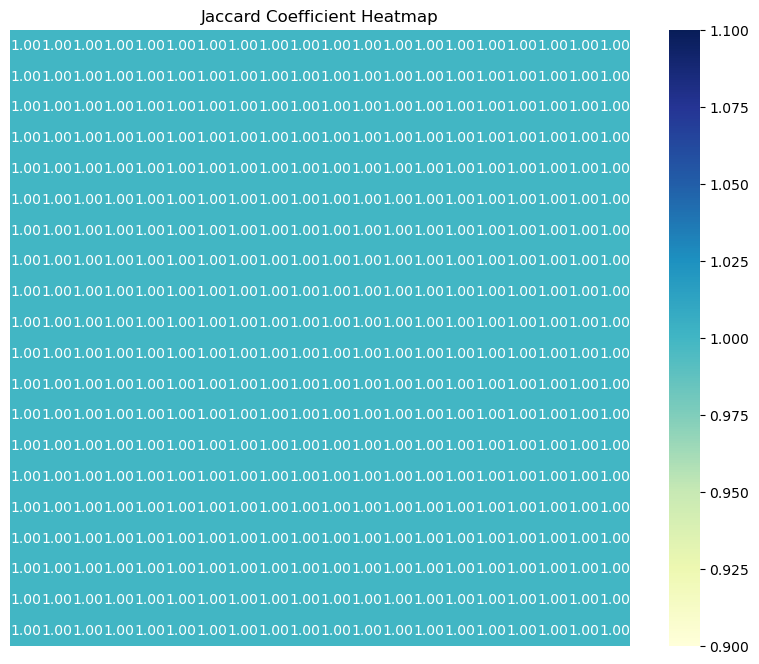

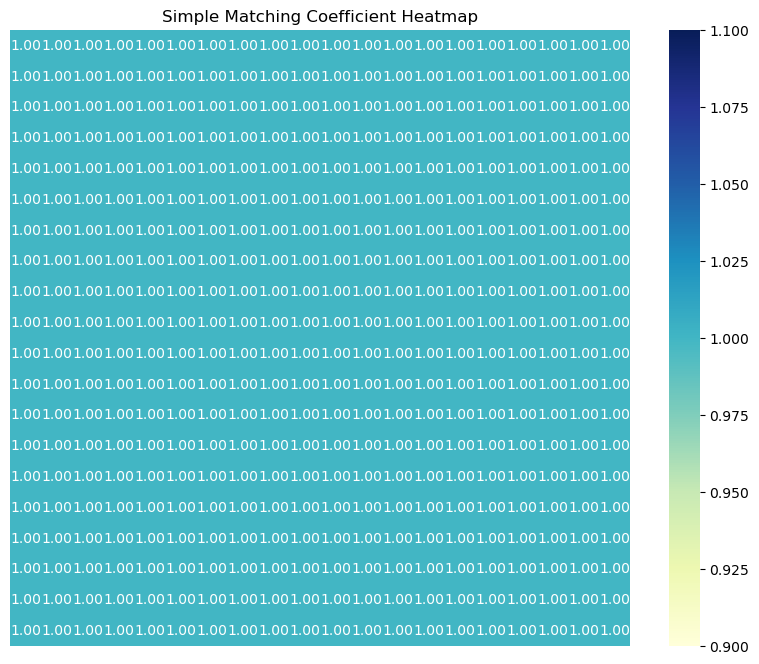

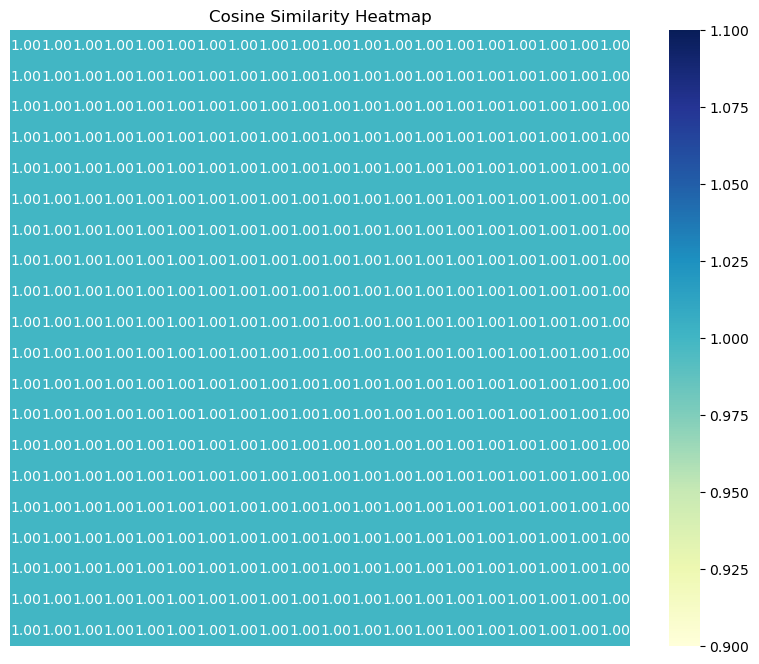

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
data = pd.read_excel('C:\\Users\\maganti akshita\\Downloads\\19CSE305_LabData_Set3.1.xlsx', sheet_name ="thyroid0387_UCI")
vectors = data.iloc[:20, 1:-1] 
def jaccard_coefficient(vector1, vector2):
    intersection = np.logical_and(vector1, vector2)
    union = np.logical_or(vector1, vector2)
    return np.sum(intersection) / np.sum(union)
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        vector1 = vectors.iloc[i].astype(bool)
        vector2 = vectors.iloc[j].astype(bool)
        jc_matrix[i, j] = jaccard_coefficient(vector1, vector2)
        smc_matrix[i, j] = jaccard_score(vector1, vector2, average='binary')
        cosine_matrix[i, j] = cosine_similarity([vector1], [vector2])[0, 0]
plt.figure(figsize=(10, 8))
sns.heatmap(jc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient Heatmap")
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(smc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient Heatmap")
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap")
plt.show()
